## Estimate the activity of a simulated surface

#### Imports

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('../scripts')
from functions import *

from tqdm.notebook import tqdm

#### Simulate HEA surface

In [2]:
# Initialize a surface from a given stochiometry
dim_x, dim_y, split = 100, 100, [0.2 , 0.2 , 0.2 , 0.2 , 0.2 ]

HEA_surface = initialize_surface(dim_x, dim_y, metals, split)

# Predict energies on all sites for both adsorbates + mixed_sites
HEA_surface = precompute_binding_energies_SPEED2(HEA_surface, dim_x, dim_y, models)

#### Estimate activity of each site

In [3]:
# Make a function, that takes a surface in and returns it with a new
# matrix representing the activities on each site

# Decisions based on deltaG I guess
# Go through all indexes (x, y) and check for any negtive H neighb
# binding energies

/Users/marcusnorgaardweng/Documents/Kurser/Speciale/CatalysisThesis/Notebooks/../scripts/functions.py:2101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


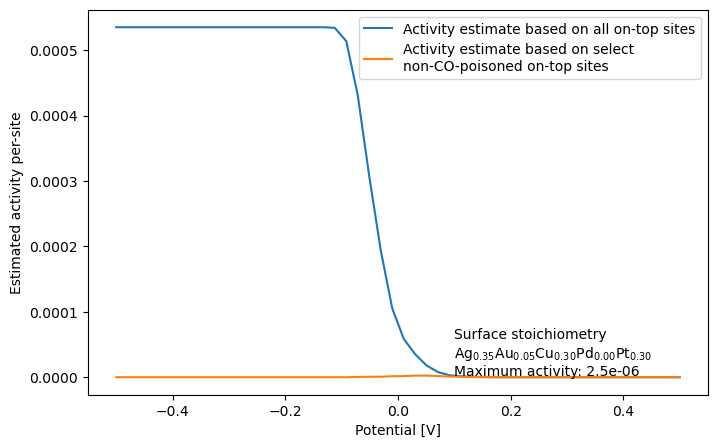

In [8]:
stoichiometry = [0.2, 0.2, 0.2, 0.2, 0.2]
stoichiometry = [0.2, 0.2, 0.599, 0.0, 0.01]
stoichiometry = [0.2, 0.2, 0.598, 0.01, 0.01]
stoichiometry = [0.0, 0.1, 0.0, 0.9, 0.0]
stoichiometry = [0.8, 0.0, 0.0, 0.0, 0.2]
stoichiometry = [0.35, 0.05, 0.3 , 0.  , 0.3 ]



activity_dict = activity_of_surface(stoichiometry, V_min=-0.5, V_max=0.5, SPEED=False)

activity_plot(activity_dict)

/var/folders/_6/524tslys67zcg0hskf43h2y40000gn/T/ipykernel_27805/455433271.py:117: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


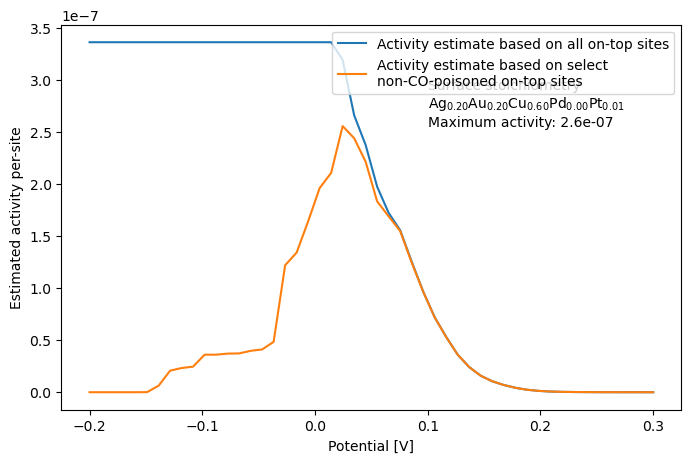

In [10]:
stoichiometry = [0.2, 0.2, 0.4, 0.1, 0.1]
stoichiometry = [0.2, 0.2, 0.599, 0.0, 0.01]

activity_dict = activity_of_surface(stoichiometry, V_min=-0.2, V_max=0.3, SPEED = False)

activity_plot(activity_dict)

/var/folders/_6/524tslys67zcg0hskf43h2y40000gn/T/ipykernel_14182/1583939377.py:114: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


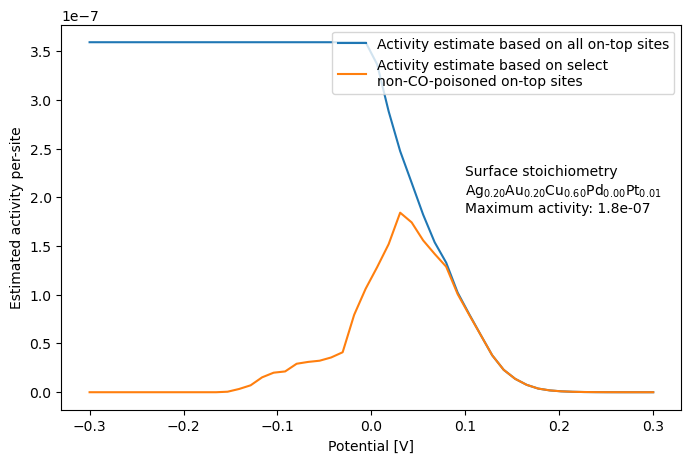

In [144]:
activity_plot(activity_dict)

In [22]:
import scipy
import itertools as it

def count_elements(elements, n_elems):
	count = np.zeros(n_elems, dtype=int)
	for elem in elements:
	    count[elem] += 1
	return count

def get_molar_fractions(step_size, n_elems, total=1., return_number_of_molar_fractions=False):
	'Get all molar fractions with the given step size'
	
	interval = int(total/step_size)
	n_combs = scipy.special.comb(n_elems+interval-1, interval, exact=True)
	
	if return_number_of_molar_fractions:
		return n_combs
		
	counts = np.zeros((n_combs, n_elems), dtype=int)

	for i, comb in enumerate(it.combinations_with_replacement(range(n_elems), interval)):
		counts[i] = count_elements(comb, n_elems)

	return counts*step_size

# Molar fractions with all five metals
molar_fractions_001 = get_molar_fractions(0.01, 5)
molar_fractions_005 = get_molar_fractions(0.05, 5)
molar_fractions_010 = get_molar_fractions(0.10, 5)
molar_fractions_020 = get_molar_fractions(0.20, 5)

# Molar fractions with just three metals - the others at 0
molar_fractions_PtAgAu = get_molar_fractions(0.05, 3)
molar_fractions_PdAgAu = get_molar_fractions(0.05, 3)
molar_fractions_PtAgCu = get_molar_fractions(0.05, 3)
molar_fractions_PtAgCu_003 = get_molar_fractions(0.03, 3)
molar_fractions_PtAgCu_002 = get_molar_fractions(0.02, 3)


# Put in the non-contributing metals
molar_fractions_PtAgAu = np.array([molar_fractions_PtAgAu.T[0], molar_fractions_PtAgAu.T[1], np.zeros(len(molar_fractions_PtAgAu)), np.zeros(len(molar_fractions_PtAgAu)), molar_fractions_PtAgAu.T[2]]).T
molar_fractions_PdAgAu = np.array([molar_fractions_PdAgAu.T[0], molar_fractions_PdAgAu.T[1], np.zeros(len(molar_fractions_PdAgAu)), molar_fractions_PdAgAu.T[2], np.zeros(len(molar_fractions_PdAgAu))]).T
molar_fractions_PtAgCu = np.array([molar_fractions_PtAgCu.T[0], np.zeros(len(molar_fractions_PtAgCu)), molar_fractions_PtAgCu.T[1], np.zeros(len(molar_fractions_PtAgCu)), molar_fractions_PtAgCu.T[2]]).T
molar_fractions_PtAgCu_003 = np.array([molar_fractions_PtAgCu_003.T[0], np.zeros(len(molar_fractions_PtAgCu_003)), molar_fractions_PtAgCu_003.T[1], np.zeros(len(molar_fractions_PtAgCu_003)), molar_fractions_PtAgCu_003.T[2]]).T
molar_fractions_PtAgCu_002 = np.array([molar_fractions_PtAgCu_002.T[0], np.zeros(len(molar_fractions_PtAgCu_002)), molar_fractions_PtAgCu_002.T[1], np.zeros(len(molar_fractions_PtAgCu_002)), molar_fractions_PtAgCu_002.T[2]]).T

# Ag, Au and Cu at the same probability, Pt and Pd independent # To put 3 metals on one axis, I just need to search for the ones in 005 where a, b, c are equal to eachother
molar_fractions_AgAuCu_PdPt_001 = []

for molar_fraction in molar_fractions_001:
    if molar_fraction[0] == molar_fraction[1] == molar_fraction[2]:
        molar_fractions_AgAuCu_PdPt_001.append(molar_fraction)
molar_fractions_AgAuCu_PdPt_001 = np.array(molar_fractions_AgAuCu_PdPt_001)

#### Estimating the activity of a stoichiometry

In [22]:
stoichiometry = [0.2, 0.2, 0.599, 0.0, 0.01]

activity_dict = activity_of_surface(stoichiometry, V_min=-0.1, V_max=0.1, SPEED=True)
print(activity_dict["special_max_j"])
print(activity_dict["special_max_eU"])

1.5338591765612364e-07
0.05714285714285716


## Brute-forcing through stoichiometries

In [23]:
estimated_activities = []
estimated_max_eUs = []

for stoichiometry in tqdm(molar_fractions_PtAgCu_002):
    activity_dict = activity_of_surface(stoichiometry, V_min=-0.15, V_max=0.2, SPEED=True)
    #print("j: " + str(activity_dict["special_max_j"]))
    #print("max eU: " + str(activity_dict["special_max_eU"]))

    estimated_activities.append(activity_dict["special_max_j"])
    estimated_max_eUs.append(activity_dict["special_max_eU"])

filename = "PtAgCu_002_activities.csv"

save_activities_csv(filename, molar_fractions_PtAgCu, estimated_activities, estimated_max_eUs)

  0%|          | 0/1326 [00:00<?, ?it/s]

Data has been saved to ../Activity_Estimation/PtAgCu_002_activities.csv


In [5]:
# Assuming you have three lists: molar_fractions_020, estimated_activities, estimated_max_eUs
def save_activities_csv(filename, molar_fractions, estimated_activities, estimated_max_eUs):
    # Specify the file name
    csv_file_name = "../Activity_Estimation/" + filename
    #filename = "molar_fractions_PtAgAu_activity.csv"

    # Combine the lists into rows
    data = zip(molar_fractions, estimated_activities, estimated_max_eUs)

    # Write to CSV file
    with open(csv_file_name, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        # Write header if needed
        csv_writer.writerow(['Molar_Fraction', 'Estimated_Activities', 'Estimated_Max_eUs'])
        
        # Write data
        csv_writer.writerows(data)

    print(f'Data has been saved to {csv_file_name}')
    return None


## Estimating the activity of "special" structured surfaces

### 1/3 Optimal swim ring surface

In [12]:
# I need to create the surfaces (Already done in the 2nd swim ring notebook)
# and put them into the activity estimateur
metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

metal_AB = []
metal_AB_max_j = []
metal_AB_max_eU = []

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:
        metal_AB.append(metal_A + metal_B)
        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        SWR_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        SWR_surface = precompute_binding_energies_SPEED(SWR_surface, dim_x, dim_y, models)
        activity_dict = activity_directly_from_surface(SWR_surface, n_points=50, V_min=-0.15, V_max=0.2)
        metal_AB_max_j.append(activity_dict["special_max_j"])
        metal_AB_max_eU.append(activity_dict["special_max_eU"])


In [13]:
for n in range(len(metal_AB)):
    print(metal_AB[n])
    print(metal_AB_max_j[n])
    print(metal_AB_max_eU[n])


PtCu
4.0435302253172266e-10
0.07857142857142857
PtAg
1.2303848564624787e-05
0.04999999999999999
PtAu
5.716592073440552e-06
0.09285714285714286
PdCu
8.368141379833104e-11
0.1571428571428571
PdAg
3.465594602403144e-11
0.2
PdAu
1.178282138525333e-13
0.14285714285714288


In [11]:
for n in range(len(metal_AB)):
    print(metal_AB[n])
    print(metal_AB_max_j[n])
    print(metal_AB_max_eU[n])


PtCu
4.0435302253172266e-10
PtAg
1.1833424866199493e-05
PtAu
5.91525137424469e-06
PdCu
8.368141379833104e-11
PdAg
3.4453654507160535e-11
PdAu
1.2195698895212104e-13


In [6]:
activity_dict = activity_directly_from_surface(SWR_surface, n_points=50, V_min=-0.15, V_max=0.2)

In [9]:
activity_dict["special_max_j"]

1.163392493452875e-13

In [5]:
SWR_surface.keys()

dict_keys(['atoms', 'stochiometry', 'ads_top', 'ads_hol', 'COOH_E', 'H_E', 'mixed_down', 'mixed_up_right', 'mixed_up_left', 'O_E', 'OH_E', 'H_G', 'COOH_G', 'H_V', 'O_V', 'COOH_V', 'OH_V', 'COOH_given_H_down', 'COOH_given_H_up_right', 'COOH_given_H_up_left', 'H_given_COOH_down', 'H_given_COOH_up_right', 'H_given_COOH_up_left'])

In [ ]:
# How, de er 1/7 under den øverste overflade
# Kan lave det om i AB_to_split
# Nu er det 

In [3]:
SWR_surface["atoms"][:,:,1]

array([['Pd', 'Au', 'Au', ..., 'Pd', 'Pd', 'Au'],
       ['Au', 'Au', 'Au', ..., 'Au', 'Pd', 'Au'],
       ['Pd', 'Au', 'Pd', ..., 'Au', 'Au', 'Pd'],
       ...,
       ['Pd', 'Au', 'Au', ..., 'Pd', 'Pd', 'Au'],
       ['Au', 'Au', 'Pd', ..., 'Au', 'Au', 'Pd'],
       ['Au', 'Au', 'Au', ..., 'Au', 'Au', 'Au']], dtype='<U2')

### 1/7 Random swim ring surface

In [ ]:
metals_A = ["Pt", "Pd"]
metals_B = ["Cu", "Ag", "Au"]

# Make the data for all metal combinations
for metal_A in metals_A:
    for metal_B in metals_B:
        split = [0, 0, 0, 0, 0]
        if metal_A == "Pt":
            split[4] += 1/7
        if metal_A == "Pd":
            split[3] += 1/7
        if metal_B == "Ag":
            split[0] += 6/7
        if metal_B == "Au":
            split[1] += 6/7
        if metal_B == "Cu":
            split[2] += 6/7

        # Initialize the bimetal surface
        BM_surface = initialize_surface(dim_x, dim_y, metals, split)

        # Should I plot it directly? Maybe easier than making an intermedian storage medium
        BM_surface = initialize_swim_surface([metal_A], [metal_B], dim_x, dim_y)
        BM_surface = precompute_binding_energies_SPEED(BM_surface, dim_x, dim_y, models)